
Bikubisch

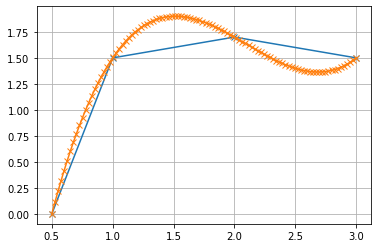

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0.5,1.0,2.0,3.0])
f = np.array([0.0,1.5,1.7,1.5])

X = np.zeros((4,4))
for i in range(4):
    X[:,i] = x**i

a = np.linalg.solve(X,f)

## plot the points and function
def evalCubicPolynomial(a,x):
    f = a[0] + a[1]*x +a[2]*x**2 + a[3]*x**3
    return f

polyPoints = np.linspace(0.5,3.0, 100)

polyVals = evalCubicPolynomial(a,polyPoints)

plt.plot(x,f,'x-')
plt.plot(polyPoints,polyVals,'x-')
plt.grid()
plt.show()

Bilineare Interpolation

/tmp/ipykernel_9503/1355957334.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.int(np.floor(coord[0]))
/tmp/ipykernel_9503/1355957334.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

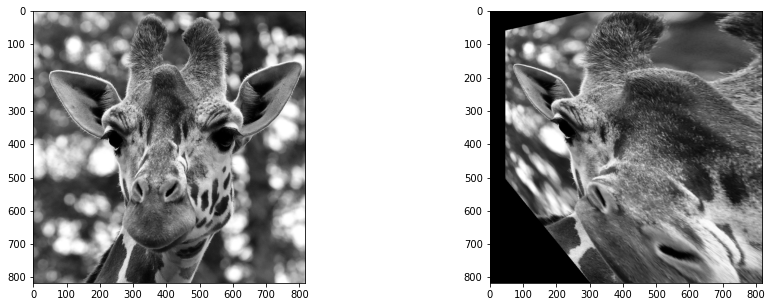

In [7]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pylab as plt
from PIL import Image

def hut(x):
    mat = np.array([ [0, -x[2], x[1]],
            [x[2], 0, -x[0]],
            [-x[1], x[0], 0] 
            ])
    return mat
#B =(a1*x , a2*x , a3*x)
def konstruiere_bi(a,x):
    return np.hstack(( a[0]*hut(x), a[1]*hut(x), a[2]*hut(x)))

#B(B1,B2,B3,B4)T
def konstruiere_B(A,X):
    B1 = konstruiere_bi(np.append(A[:,0],[1]), np.append(X[:,0],[1]))
    B2 = konstruiere_bi(np.append(A[:,1],[1]), np.append(X[:,1],[1]))
    B3 = konstruiere_bi(np.append(A[:,2],[1]), np.append(X[:,2],[1]))
    B4 = konstruiere_bi(np.append(A[:,3],[1]), np.append(X[:,3],[1]))
    return np.vstack((B1, B2, B3, B4))
    
def kleinster_ev(B):
    w, v = LA.eig(B)
    minimale_EW = np.argmin(w)
    return v[:,minimale_EW]
    
    
def interpolateBilin(img,coord):

    # change the coordinates to the floor numbers
    i = np.int(np.floor(x))
    j = np.int(np.floor(y))
    
    # control i and j to be in range of our bild coordinate and do not be negativ numbers
    if i > img.shape[0]-2:
        return 0.0
    if j > img.shape[1]-2:
        return 0.0
    if i < 0:
        return 0.0
    if j < 0:
        return 0.0
    
    #calculate the new changed of i and j with bilinear interpolation 
    helper1 = ((x-dist_x) * wert_xplus1_y) + ((dist_x+1-x) * wert_x_y)
    helper2= ((x-dist_x) * wert_xplus1_yplus1) + ((dist_x+1-x) * wert_x_yplus1)  
    temp = (coord[1] - j)*temp2 + (j+1 - coord[1]) *temp1
    return temp
    
def main():
      # load image
    img = Image.open("giraffe.jpg").convert('L')
    img = np.array(img) / 255.0

    # coordinates
    A = np.array([[100,100,380,300],[100,300,100,300]], dtype=float)
    X = np.array([[110,100,290,300],[100,300,100,300]], dtype=float)

    # create transformation matrix
    B = konstruiere_B(A,X)
    BtB = np.matmul(B.T,B)
    H_inv = np.linalg.inv(kleinster_ev(BtB).reshape(3,3).T)

  


    ## perform bilinear interpolation to correct the perspective distortion
    shiftedImg = np.copy(img)
    it = np.nditer(shiftedImg, flags=['multi_index'])
    while not it.finished:
        z = np.append(it.multi_index, [1]) # mit 1 homogen machen # z ist vektor
        # H invers durch dritte Zeile Berechnen
        x_temp = np.matmul(H_inv,z)
        x_temp = x_temp / x_temp[2]

        shiftedImg[it.multi_index] = interpolateBilin(img, x_temp)
        it.iternext()

    # shiftedImg = np.copy(img)
    # ny , nx = img.shape
    # for i in range( 0, ny):
    #     for j in range (0, nx):
    #         z = [i,j,1]
    #         x_temp = np.matmul(H_inv,z)
    #         x_temp = x_temp / x_temp[2]
    #         shiftedImg[i,j] = interpolateBilin(img,x_temp)

    # visualize the result
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(shiftedImg,cmap="gray")
    plt.show()
    
    
if __name__ == "__main__":
    main()